<a href="https://colab.research.google.com/github/RooKeeh/AI-Google-Colab/blob/main/arbori_de_decizie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Arbori de decizie**



---
***Etape in construirea unui model***


1.   Definirea problemei si obtinerea setului de date
2.   Definirea variabilelor independente si a variabilei tinta
3. Partitionarea datelor in Training si Validare (Testare)
4. Construirea modelului (in exemplul nostru Arbore de decizie)
5. Evaluarea modelului (alegerea celei mai potrivite masuri, in functie de tipul problemei)
6. (Optional) Vizualizari ale modelului.





***Descrierea problemei***

Diagnosticarea pacientilor pentru diabet, avand la dispozitie o serie de diagnostice bazate pe mai multe variabile masurate. 
Variabila tinta este binara (Pozitiv/Negativ).

Sursa datelor:
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database?resource=download

Importul bibliotecilor

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics


Incarcarea datelor

In [4]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df = pd.read_csv("diabetes.csv", header=None, skiprows = 1, names=col_names)

Vizualizare date

In [6]:
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Definirea variabilei tinta

In [7]:
y=df.label
X=df.drop(columns='label')

Partitionarea datelor (70% training, 30% test)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

Construirea arborelui de decizie

In [9]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

Evaluarea modelului (accuracy)

In [10]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7186147186147186


Vizualizare arbore

***Biblioteci pt vizualizare***

In [11]:
!pip install graphviz
!pip install pydotplus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [12]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

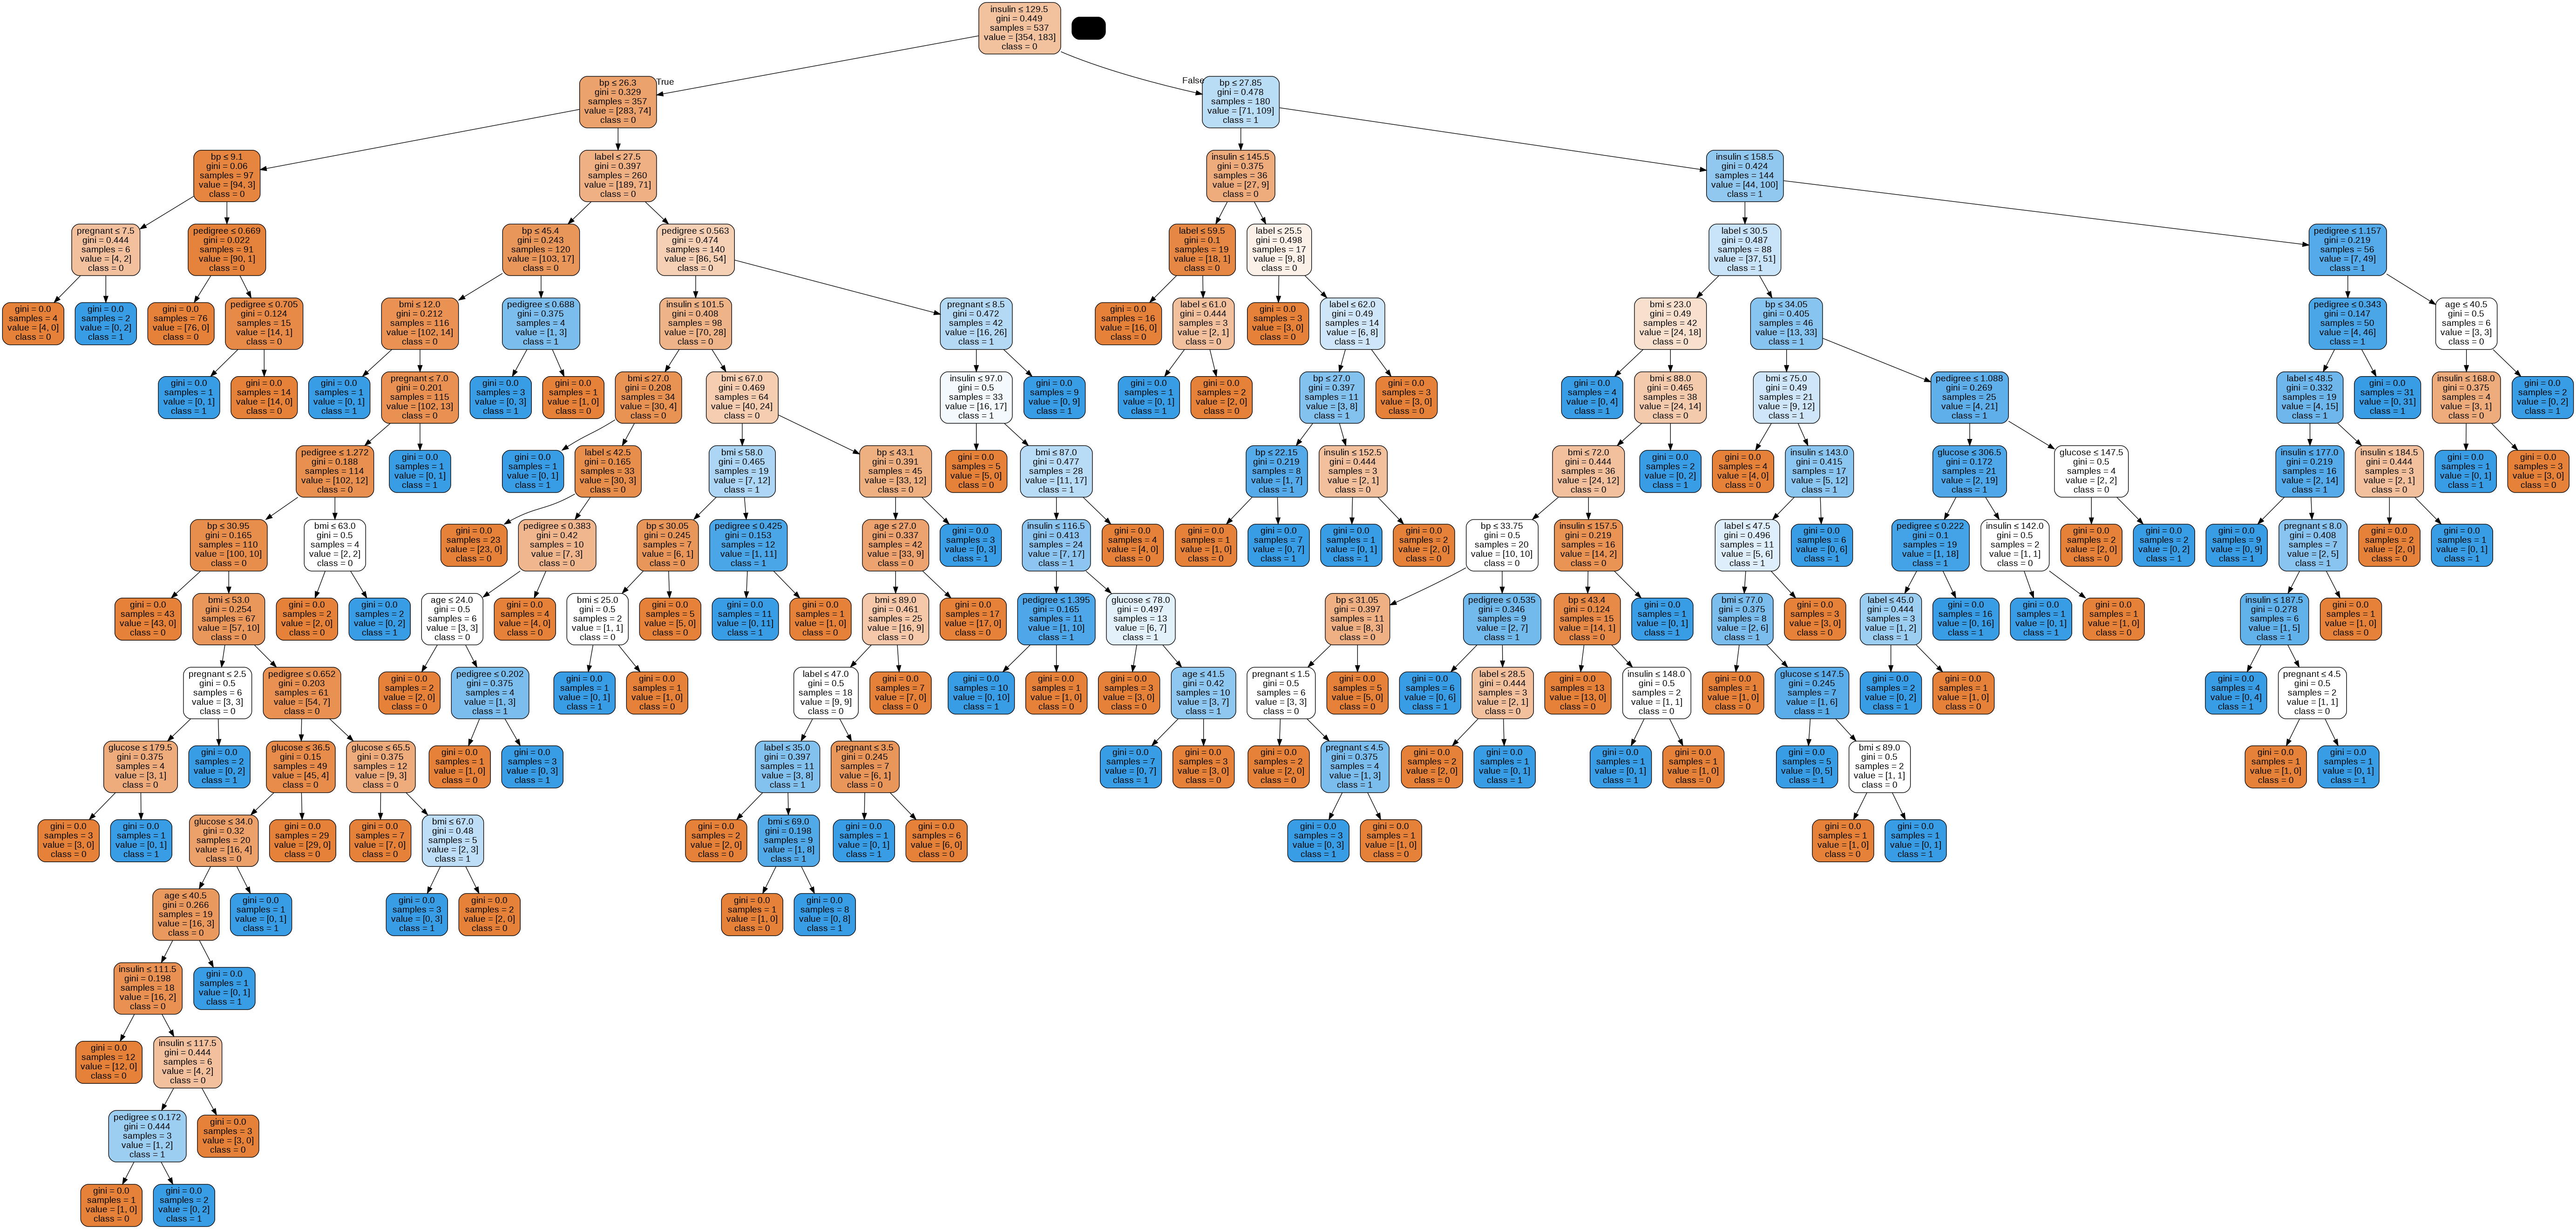

In [13]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree', 'label'],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

**Exercitii**
1. Studiati functionalitatile modelului DecisionTreeClassifier() din biblioteca scikitlearn.
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

2. Modificati parametrii modelului si observati schimbarile in performanta. 

3. Cautati variante pentru pruning (reducerea dimensionalitatii arborelui) in aceeasi biblioteca.